# Statistical Power Assignment

In [3]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

%matplotlib inline

### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [4]:
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=0.5, nobs1=None, alpha=0.05, power=0.8, ratio=1.0)
2 * math.ceil(result)

128

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [10]:
effect_size = analysis.solve_power(effect_size=None, nobs1=100, alpha=0.05, power=0.8, ratio=1.0)
effect_size

0.39813911739112756

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

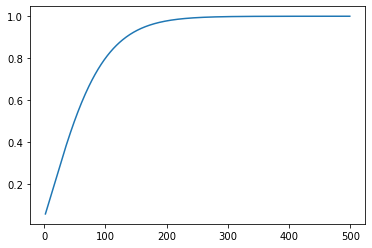

In [12]:
results = []
samples = range(1,500)
for i in samples:
    results.append(analysis.solve_power(effect_size=effect_size, nobs1=i, alpha=0.05, power=None, ratio=1.0))
plt.plot(samples, results)

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [13]:
analysis.solve_power(effect_size=0.4, nobs1=100, alpha=0.05, power=None, ratio=1.0)

0.8036474965430769

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

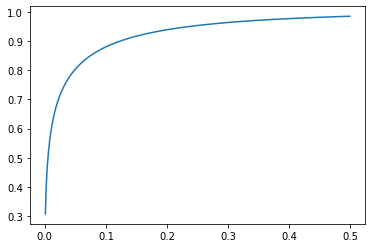

In [28]:
results = []
significance_levels = pd.Series(range(1,500))
significance_levels = significance_levels/1000
for i in significance_levels:
    results.append(analysis.solve_power(effect_size=0.4, nobs1=100, alpha=i, power=None, ratio=1.0))
plt.plot(significance_levels, results)

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [37]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'
df = pd.read_csv(data_url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df = df.dropna()
df_survived = df.loc[df['Survived'] == 1]
df_not_survived = df.loc[df['Survived'] == 0]

### Summarize the number of observations and average age per group.

In [57]:
n_obs1 = len(df_not_survived['Age'])
n_obs2 = len(df_survived['Age'])
mean_of_sample1 = df_not_survived['Age'].mean()
mean_of_sample2 = df_survived['Age'].mean()

var1 = df_not_survived['Age'].var()
var2 = df_survived['Age'].var()

### Perform t-test.

In [58]:
stats.ttest_ind(df_not_survived['Age'],df_survived['Age'])

Ttest_indResult(statistic=3.53435125095576, pvalue=0.0005189503307881672)

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [62]:
pooled_stdev = math.sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))
effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev
ratio = n_obs2/n_obs1
effect_size

0.5565536974630488

**Use the effect size you calculated to compute the statistical power of this test.**

In [60]:
analysis.solve_power(effect_size=effect_size, nobs1=n_obs1, alpha=0.05, power=None, ratio=ratio)

0.9400951377841825

**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [61]:
analysis.solve_power(effect_size=None, nobs1=n_obs1, alpha=0.05, power=0.8, ratio=ratio)

0.4435226492804944

**Determine the sample size necessary to get a statistical power of 0.8.**

In [66]:
sample_size = analysis.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8, ratio=ratio)
math.ceil(sample_size)

39

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

0.00785621360820275

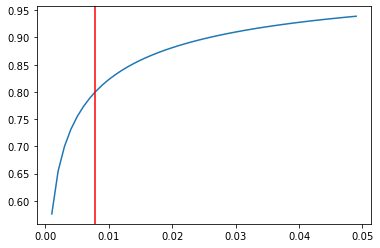

In [78]:
results = []
significance_levels = pd.Series(range(1,50))
significance_levels = significance_levels/1000
for i in significance_levels:
    results.append(analysis.solve_power(effect_size=effect_size, nobs1=n_obs1, alpha=i, power=None, ratio=ratio))
plt.plot(significance_levels, results)
a = analysis.solve_power(effect_size=effect_size, nobs1=n_obs1, alpha=None, power=0.8, ratio=ratio)
plt.axvline(a, color='r')
a